In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

# special matplotlib command for global plot configuration
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'

## Section 9: Logistic Regression, Naive Bayes and ...

Last time:

Today:
- Logistic Regression
- Perceptron


## Logistic Regression for Spam Filtering

*This example is borrrowed from 'Mastering Machine Learning with scikit-learn' by Gavin Hackeling (2014)*

###Binary classification with logistic regression
In logistic regression, the response variable describes the probability that the outcome is teh positive case.  If the response variabel is equal to or exceeds a discrimination threshold, then the positive case is predicted. Otherwise the negative class is predicted.  The response variable is modeled as a function of a linear combination of the explanatory variables using the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).  

Example use cases:
- coin toss
- spam filtering
- medical diagnosis

###Spam filtering
We'll use TF-IDF features to help classify emails and SMS messages as either spam or not using logistic regression
 
You can download the data from [here](http://archive.ics.uci.edu/ml/machine-learning-databases/00228/)

And start with some basic exploratory analysis.

In [2]:
spam = pd.read_csv('SMSSpamCollection', delimiter='\t', names=['label', 'email'], header=None)

In [51]:
spam.head()

,label,email,binary
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
spam[spam['label'] == 'spam'].count()

label    747
email    747
dtype: int64

In [5]:
spam[spam['label'] == 'ham'].count()

label    4825
email    4825
dtype: int64

In [6]:
(spam[spam['label'] == 'ham'].count())/spam.count()

label    0.865937
email    0.865937
dtype: float64

In [9]:
print(spam['label'][2]," : ", spam['email'][2])

spam  :  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


Convert the label into a binary value which is required for some of the classification scoring that we'll use later

In [28]:
spam['binary'] = np.array([1 if y =='spam' else 0 for y in spam['label']])

### Prediction using scikit-learn

We'll use the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) library method to help make some predictions about what is and isn't spam. 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

In [52]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(spam['email'], spam['binary'])

Create a [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from the training data.  Remember that the [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) algorithm is a statistical measure that attempts to capture how important a word a word is within a document.  The TfidVectorizer function used here uses the same algorithm over a collection of documents or in this case, emails and SMS messages. 

In [53]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

Create the LogisticRegression classifier to train the model

In [54]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [55]:
predictions

array([1, 0, 0, ..., 0, 1, 0])

In [56]:
print("Pred :\tTruth ->\tEmail")
for i, prediction in enumerate(predictions[:50]):
    print(predictions[i], ":\t", spam['binary'][i], "->\t", spam['email'][i])

Pred :	Truth ->	Email
1 :	 0 ->	 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
0 :	 0 ->	 Ok lar... Joking wif u oni...
0 :	 1 ->	 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
0 :	 0 ->	 U dun say so early hor... U c already then say...
0 :	 0 ->	 Nah I don't think he goes to usf, he lives around here though
0 :	 1 ->	 FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
0 :	 0 ->	 Even my brother is not like to speak with me. They treat me like aids patent.
0 :	 0 ->	 As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
0 :	 1 ->	 WINNER!! As a valued network customer you have been selected to receivea £900 priz

### Binary Classifier Performance

Several methods are available to evaluate performance of binary classifiers.  But remember that for binary classifiers the only meausure of success is correct classification, unlike linear regression, where a distance metric was calculated.  

Binary classification metrics include:
- accuracy
- precision
- recall
- F1 measure
- ROC AUC score

All of these measures depend on the concepts of true positive, true negatives, false positives, and false negatives. 

### Accuracy

Accuracy measures the fraction of the classifier predictions that are correct.  We'll use the scikit learn [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to help here

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
# a simple example for demonstration
y_pred, y_true = [0, 1, 1, 0], [1, 1, 1, 1]

In [41]:
print("Accuracy: ", accuracy_score(y_true, y_pred))

Accuracy:  0.5


Now apply this to the classification model built earlier

In [42]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
scores

array([ 0.95574163,  0.9569378 ,  0.96291866,  0.95933014,  0.94730539])

###Precision and Recall

Remember that Precision is the ratio of true positives to true positives plus false positives or how many of the messages classified as spam are actually spam

$$P =\frac{TP}{TP+FP}$$

And Recall is the ratio of true positives to true positives plus false negatives and it's a measurement that shows the fraction of spam messages that were actually classified as spam

$$R = \frac{TP}{TP+FN}$$

Precision and Recall alone are not great measurements for binary classifiers.  

### ROC curves
The Receiver Operating Characteristic or ROC curve is a way to visualize performance.  A nice benefit to ROC curves is its insenstivity to to data sets with unbalanced class proportions.  ROC curves plot the classifier's false positives against the total number of negatives. 

$$F = \frac{FP}{TN+FP}$$

AUC is the area under the curve and it reduces the ROC curve to a single value that represents the expected performance of the classifier.  

We'll use [roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and [auc](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html).  Note that the roc_curve function expects probability estimates of the positive class for each value to be classified. So to get that we'll use a predict_proba which is a function of most classifiers like [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [43]:
from sklearn.metrics import roc_curve, auc

In [58]:
predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:,1])
roc_auc = auc(false_positive_rate, recall)

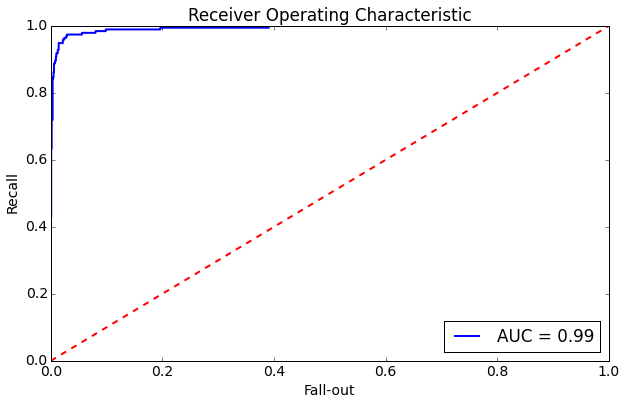

In [59]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

## Multi-class classification

Many classification problems have more than just two classes which samples can be assigned. The goal of multi-class classification is to assign a sample to one of many possible classes.  The scikit-learn package implements this with a one vs all method which essentially uses a binary classifier for each of the possible classes. Then the class with the greatest prediction confidence is assigned to the sample. 

We'll return to our favorite dataset - the iris dataset for this example of [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  Note that the LogisticRegression function in sklearn already knows how to deal with multiple classes - there's nothing special that we need to do here. 

In [61]:
from sklearn import datasets

In [65]:
iris = datasets.load_iris()

In [71]:
X = iris.data[:, :2]
y = iris.target

In [72]:
iris_cf = LogisticRegression()
iris_cf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [73]:
h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = iris_cf.predict(np.c_[xx.ravel(), yy.ravel()])

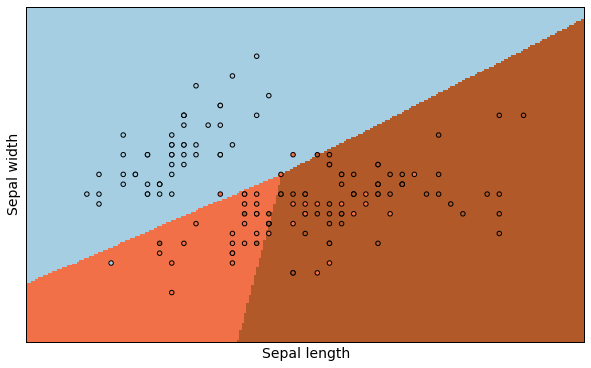

In [76]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Perceptron

The [perceptron](https://en.wikipedia.org/wiki/Perceptron) is a binary classifier that can learn from individual training instances, which can be useful for training from large datasets.  

It's designed to be a simple model of a neuron with multiple inputs ($x$) and different weights for each input ($w$)

$$s = \sum_{i=0}^n w_i \cdot x_i$$

Here's a simple version of such a perceptron using Python and NumPy. It will take two inputs and learn to act like the logical OR function.

In [77]:
from random import choice 
from numpy import array, dot, random

Then let's create the step function.

In [78]:
unit_step = lambda x: 0 if x < 0 else 1

Next we need to map the possible input to the expected output. The first two entries of the NumPy array in each tuple are the two input values. The second element of the tuple is the expected result. And the third entry of the array is a "dummy" input (also called the bias) which is needed to move the threshold (also known as the decision boundary) up or down as needed by the step function. Its value is always 1, so that its influence on the result can be controlled by its weight.

In [79]:
training_data = [(array([0,0,1]), 0), 
                 (array([0,1,1]), 1), 
                 (array([1,0,1]), 1), 
                 (array([1,1,1]), 1), ]

This now looks exactly like an OR function

Setup the initial random weights to be between 0 and 1.  The errors list is only used to store the error values so that they can be plotted later on. The eta variable controls the learning rate. And n specifies the number of learning iterations

First we get a random input set from the training data. Then we calculate the dot product ( also called scalar product or inner product) of the input and weight vectors. This is the (scalar) result, which we can compare to the expected value. If the expected value is bigger, we need to increase the weights, if it's smaller, we need to decrease them. This correction factor is calculated in the last line, where the error is multiplied with the learning rate (eta) and the input vector (x). It is then added to the weights vector, in order to improve the results in the next iteration.

In [83]:
for i in range(n): 
    x, expected = choice(training_data) 
    result = dot(w, x) 
    error = expected - unit_step(result) 
    errors.append(error) 
    w += eta * error * x

In [84]:
for x, _ in training_data: 
    result = dot(x, w) 
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.18616342160661736 -> 0
[0 1]: 0.6847705581002739 -> 1
[1 0]: 0.6102093024404375 -> 1
[1 1]: 1.481143282147329 -> 1


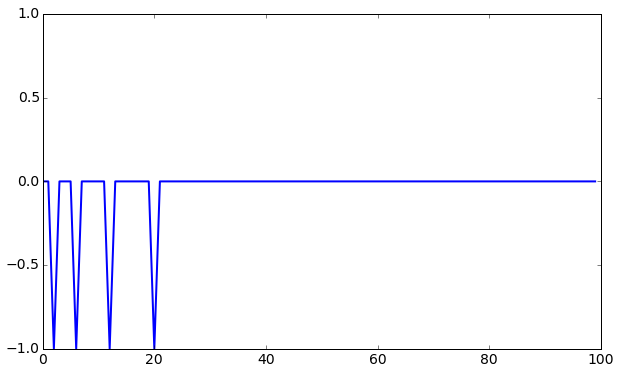

In [86]:
plt.plot(errors)
plt.ylim(-1,1)
plt.show()